In [103]:
import numpy as np
import networkx as nx
from grakel import GraphKernel
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

In [104]:
from torch_geometric.datasets import TUDataset
tu_data = TUDataset(root="tutorial1",name= "Yeast")
# https://pytorch-geometrimport networkx as nx
t1 = tu_data[1]
len(t1)

4

In [105]:
G1 = to_networkx(t1, node_attrs=["x"], edge_attrs=["edge_attr"])

In [106]:
G1.size()

108

## Plot G1

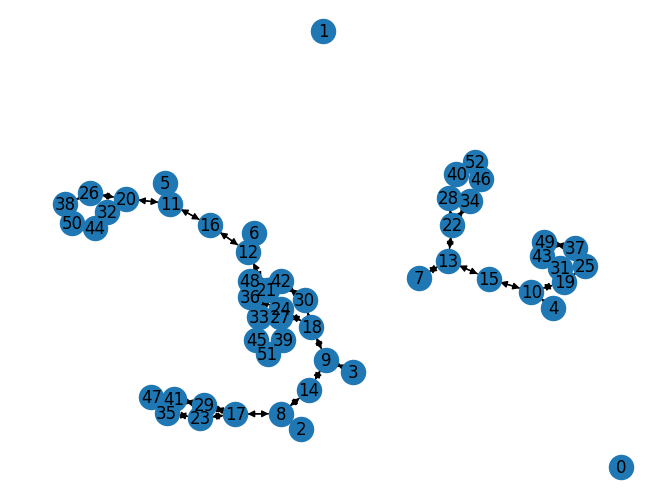

In [107]:
nx.draw(G1, with_labels = True)
plt.show()

In [108]:
UG1 = G1.to_undirected()

In [109]:

connected_components = nx.connected_components(UG1)

In [111]:
connected_components = sorted(nx.connected_components(UG1), key=len, reverse=True)

In [112]:
connected_components

[{2, 3, 8, 9, 14, 17, 18, 23, 24, 29, 30, 35, 36, 41, 42, 47, 48},
 {4, 7, 10, 13, 15, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52},
 {5, 6, 11, 12, 16, 20, 21, 26, 27, 32, 33, 38, 39, 44, 45, 50, 51},
 {0},
 {1}]

In [113]:
largest_component = connected_components[0]

In [114]:
len(largest_component)

17

In [115]:
second_component = connected_components[1]

In [116]:
 SG1 = G1.subgraph(largest_component)

In [117]:
 SG2 = G1.subgraph(second_component)

## Plot SG1

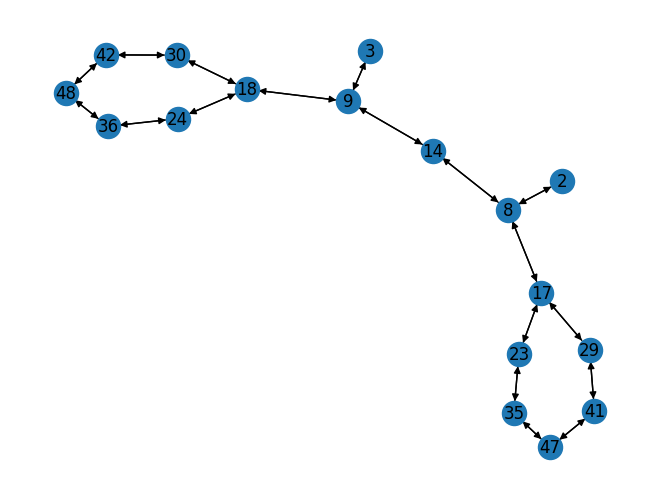

In [118]:
nx.draw(SG1, with_labels = True)
plt.show()

## Plot SG2

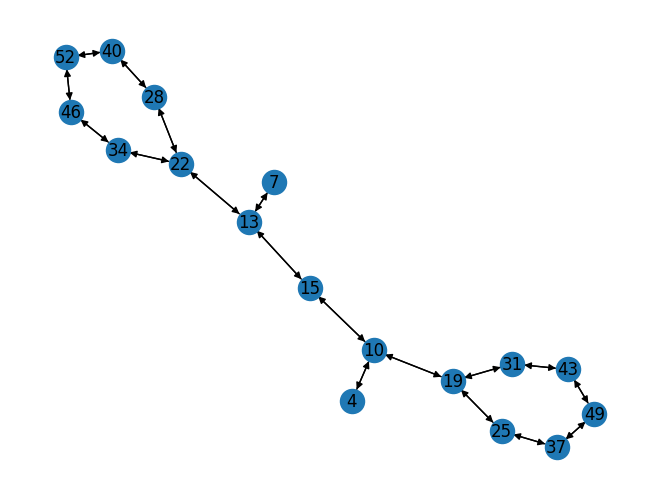

In [119]:
nx.draw(SG2, with_labels = True)
plt.show()

## Calculating the radius of SG1 & SG2

In [121]:
import networkx as nx

def radius_of_graph(G):
  
  if not nx.is_connected(G):
    raise nx.NetworkXError("Radius is not defined for disconnected graphs.")
  
  eccentricities = nx.eccentricity(G)
  radius = min(eccentricities.values())
  return radius

undirected_G = SG1.to_undirected()
radius = radius_of_graph(undirected_G)
print(f"The radius of the graph is: {radius}")


The radius of the graph is: 5


In [122]:
undirected_G2 = SG2.to_undirected()
radius2 = radius_of_graph(undirected_G2)
print(f"The radius of the graph is: {radius2}")


The radius of the graph is: 5


## Calculates the cosine similarity kernel between two graphs, comparing their node embeddings within a specified radius

In [129]:
import networkx as nx
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def compute_node_embeddings(graph, radius):
    """
    Compute node embeddings for a graph up to a specified radius.

    Parameters:
        graph (networkx.Graph): Input graph.
        radius (int): Maximum radius for neighborhood aggregation.

    Returns:
        numpy.ndarray: Node embeddings for the graph.

    """
    num_nodes = len(graph.nodes)
    node_embeddings = np.zeros((num_nodes, num_nodes))  # Initialize node embeddings matrix

    # Iterate over nodes and aggregate neighborhood information
    for node in graph.nodes:
        neighborhood = nx.single_source_shortest_path_length(graph, node, cutoff=radius)
        for neighbor, distance in neighborhood.items():
            node_embeddings[node][neighbor] = 1.0 / (1.0 + distance)  # Weighted distance-based aggregation

    return node_embeddings

def cosine_similarity_kernel(graph1, graph2, radius):
    """
    Compute the cosine similarity kernel between two graphs within a specified radius.

    Parameters:
        graph1 (networkx.Graph): First input graph.
        graph2 (networkx.Graph): Second input graph.
        radius (int): Maximum radius for neighborhood aggregation.

    Returns:
        numpy.ndarray: Cosine similarity kernel between the graphs.
    """
    # Compute node embeddings for each graph up to the specified radius
    embeddings1 = compute_node_embeddings(graph1, radius)
    embeddings2 = compute_node_embeddings(graph2, radius)

    # Pad the matrices to match the maximum number of nodes between the two graphs
    # Padding with zeros to ensure equal dimensions for comparison (using NumPy's pad function), as the graphs might have different numbers of nodes.
    max_nodes = max(embeddings1.shape[0], embeddings2.shape[0])
    embeddings1_padded = np.pad(embeddings1, ((0, max_nodes - embeddings1.shape[0]), (0, max_nodes - embeddings1.shape[1])), mode='constant')
    embeddings2_padded = np.pad(embeddings2, ((0, max_nodes - embeddings2.shape[0]), (0, max_nodes - embeddings2.shape[1])), mode='constant')

    # Compute cosine similarity kernel
    kernel = cosine_similarity(embeddings1_padded, embeddings2_padded)

    return kernel

In [141]:
kernel = cosine_similarity_kernel(G1, G2, 2)
print(kernel)

[[0.50174521 0.17277369 0.16439899 ... 0.         0.         0.        ]
 [0.1672484  0.51832106 0.16439899 ... 0.         0.         0.        ]
 [0.32162669 0.30851978 0.62100328 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
